<a href="https://colab.research.google.com/github/The-Algorist/twitter_api-data-gathering-wrangling-cassessing-cleaning-and-visualization/blob/main/Gideon_Warui_Data_Science_NanoDegree_Project_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Project 2**

**Wrangle and Analyze data**

Author : Gideon Warui Wanjiru

Project : Data Wrangling and Analysis

Date : 27/06/2022

Version : 1.0 

**Project Summary**

This project aims to give to the student a real case of how to gather, assess, clean, and analyze the data, in other words its englobes the Data Wrangling and Exploratory Data Analysis. The database used as an example is about the @dog_rate user from Twitter, as known as WeRateDogs™.

The Data Gathering process bundled three different tasks, the first one download file from URL and later loading to the Jupyter Notebook, which requires a manual step, the second downloading a file programmatically, and the third gathering data from the Twitter API. This step has also required to save these data in a local machine.

Based on the data gathered, I have assessed the most evident issues (17 issues in total) and documented it to create a record of modifications. Later, in Data Cleaning process I have fixed all identified issues, and I have also merged (the two downloaded files from the Data Gathering process) into one and added some missing values (from the archive downloaded from the Twitter API). The final data frame was stored as twitter_archive_master.csv.

In the Data Analysis and Visualization, which I have interpreted as Exploratory Analysis, I have posed few questions to guide my analysis, which lead me to found strong evidence of:

- Seasonality in the number of tweets along the week 
and along the year;
- A positive correlation between the number of retweets and the number of favourites, and;
- No correlation between the algorithms output used to predict the dog breed.

Finally, the Project also has other deliverables, which could be accessed by the following links: 

- Act Report, and;
- Wrangle Report.



# **Introduction**

**Importing Libraries**

In [ ]:
# Importing Library.

# Importing pandas to work with DataFrames.
import pandas as pd
pd.set_option('mode.chained_assignment','raise')

# Importing numpy to general methods.
import numpy as np

# Importing OS package to write and open files.
import os

# Importing the requests to create a object from a given URL.
import requests

# Importing the Client Code to use the Twitter API.
import tweepy

# Importing the json package to easy my task with json files
import json

# Importing the time package to calculate the elapse time to access the Twitter API
import time

# Importing the re package to use the regular expressions.
import re

# Importing the matplotlib to create graphics
import matplotlib.pyplot as plt
%matplotlib inline

# Import seaborn to better the visualization
import seaborn as sns

import datetime

import requests

# **Gathering the data**

Downloading the files from Udacity

In [ ]:
# Creating a folder to store the files.
folder = "Data-A" # Folder's name.

# Checking if the folder already exist.
if not folder in os.listdir():
    os.mkdir(folder)  # Creating the folder when 01-Dataset do not exist.

# List of files.
list_url = ['https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv']

# Loop to download the files hosted in Udacity website.
for url in list_url:
    if not url.split('/')[-1].replace('-','_') in os.listdir(folder):                              # Check if the files already exist.
        response = requests.get(url)                                                               # Creating an object of the given URL.
        with open(os.path.join(folder,url.split('/')[-1].replace('-','_')), mode = 'wb') as file:  # Defining the file name.
            file.write(response.content)     

Loading datasets into environment

In [ ]:
# Loading the image precictions
image_df = pd.read_csv('Data-A/image_predictions.tsv', sep = '\t') # tsv file need to configure the sep as tabular.

# Loading the archive of WeRateDogs.
archive_df = pd.read_csv('/content/Data-A/twitter-archive-enhanced.csv') # regular csv file.

Gathering from the twitter API

In [ ]:
# access details are generated from twitter.
consumer_key = 'sJz1AgEdtJAJd12j1kO7j46Ko'                               # API key
consumer_secret = 'EVQ3ik68nxawxE15RVKoEl0coOkzfwa34fJVM1srj7SU24J23q'   # API secret key
access_token = '725060702516432897-rQJsDW1Zx4scDO0JOG0VJOMkxvqqRuq'      # Access token
access_secret = 'zORHOP7RodjY9Lh87WmAr5UIwgHrr1fgVTHv5otRumUqQ'          # Access token secret

# To control sending api requests
SEND_API_REQUEST = True

Authentication

In [ ]:
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)
api = tweepy.API(auth, wait_on_rate_limit = True, wait_on_rate_limit_notify = True)

In [ ]:
# Unique tweets of twitter-archive-enhanced-2.csv file.
unq_twt_id = archive_df.tweet_id.tolist()

# Print the number of unique tweets.
len(archive_df.tweet_id.unique())

2356

In [ ]:
# Initializing the dicitionary to store the raw data from Twitter API JSON file.
raw_tweet_dict = {}

# This is the list of error.
error_df = []

# Current time when the Twitter API starts.
str_loop = time.time()

# Loop to find each tweet_id of u_twt_id list.
for tweet in unq_twt_id:
    # This is necessary to avoid an interruption if any tweet_id is not find.
    try:
        # The get_status will find a specific tweet_id and return all the tweet.
        twt_status = api.get_status(tweet,
                                    wait_on_rate_limit = True,         # Automatically wait for rate limits to replenish.
                                    wait_on_rate_limit_notify = True,  # Print the notification "Rate limit reached..."
                                    tweet_mode = 'extended')           # I want the full text without "...".
        # The data I want is the _json dictionary.
        raw_tweet_dict[str(tweet)] = twt_status._json                     # Bear in mind, _json is a dictionary.
    # In case of a problem, a message will be printed.
    except:
        error_df.append(str(tweet))                                    # Update df_error list.
        print("tweet_id was not found: {}".format(str(tweet)))

# Current time when the Twitter API ends.
end_loop = time.time()

tweet_id was not found: 892420643555336193
tweet_id was not found: 892177421306343426
tweet_id was not found: 891815181378084864
tweet_id was not found: 891689557279858688
tweet_id was not found: 891327558926688256
tweet_id was not found: 891087950875897856
tweet_id was not found: 890971913173991426
tweet_id was not found: 890729181411237888
tweet_id was not found: 890609185150312448
tweet_id was not found: 890240255349198849
tweet_id was not found: 890006608113172480
tweet_id was not found: 889880896479866881
tweet_id was not found: 889665388333682689
tweet_id was not found: 889638837579907072
tweet_id was not found: 889531135344209921
tweet_id was not found: 889278841981685760
tweet_id was not found: 888917238123831296
tweet_id was not found: 888804989199671297
tweet_id was not found: 888554962724278272
tweet_id was not found: 888202515573088257
tweet_id was not found: 888078434458587136
tweet_id was not found: 887705289381826560
tweet_id was not found: 887517139158093824
tweet_id wa

In [ ]:
# Calculating the elapsed time in minutes.
elapsed_time = (end_loop - str_loop)/60

# Printing the elapsed time of the loop.
print("Elapsed time: {} minutes".format(round(elapsed_time,2)))

Elapsed time: 2.95 minutes


In [ ]:
# Import every tweet JSON data into 'tweet_json.txt' as a separate line
# wait for 15 minutes (automatically) each time the rate limit is hit 
# (for taking tweets data, the limit is 900 tweets per 15 minutes)

#file_name = 'tweet_json.txt'

# Create a file, remove previous one if exists
#open(file_name, 'w').close()

# Create a file if it doesn't exist
#if not os.path.isfile(file_name):
    #open(file_name, 'w').close()

Using JSON.TXT file since the API calls resulted in failure to access the tweets

In [ ]:
# Loading the tweet_json.txt as a panda DataFrame.
raw_tweet_df= pd.read_json('Data-A/tweet_json.txt', lines = True) # Atention to the lines defined as index.

# Printing the first 5 rows.
raw_tweet_df.head()

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status
0,2017-08-01 16:23:56+00:00,892420643555336193,892420643555336192,This is Phineas. He's a mystical boy. Only eve...,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,39467,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
1,2017-08-01 00:17:27+00:00,892177421306343426,892177421306343424,This is Tilly. She's just checking pup on you....,False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,33819,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
2,2017-07-31 00:18:03+00:00,891815181378084864,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,False,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,25461,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
3,2017-07-30 15:58:51+00:00,891689557279858688,891689557279858688,This is Darla. She commenced a snooze mid meal...,False,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,42908,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
4,2017-07-29 16:00:24+00:00,891327558926688256,891327558926688256,This is Franklin. He would like you to stop ca...,False,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,41048,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN


Finally, I have gathered all three datasets:

  - [tweet_json.txt](/content/Data-A/tweet_json.txt) as raw_tweet_df;
  - image_predictions.tsv as image_df, and;
  - twitter_archive_enhanced.csv as archive_df.

# **Assessing the data**

The issues could be defined into two types:

- Quality issues: Dirty data;
   - Missing, duplicated, or incorrect data;
- Lack of tidiness: Also known as messy data;
   - Structural issues.

**Objectives**

Project requirements extracted from the project rubric.

- *At least eight (8) data quality issues and two (2) tidiness issues are detected, and include the issues to clean to satisfy the Project Motivation. Each issue is documented in one to a few sentences each.*

**Methodology**

Simple, clear and precise analysis by detecting and documenting the errors in each of the three datasets

**DataSet 1**

[Image_Predictions.tsv](/content/Data-A/image_predictions.tsv)

In [ ]:
# previweing the head
image_df.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [ ]:
# previweing the bottom of the data
image_df.tail()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2074,892420643555336193,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False


**From visual inspection, there are inconsistencies in the breed name, some names have the first letter capitalized while others are not.**

In [ ]:
print('Number of rows    : ', image_df.shape[0])
print('Number of columns : ', image_df.shape[1])

Number of rows    :  2075
Number of columns :  12


**The dataset has 2075 entries/rows, it also has 12 columns**

In [ ]:
# overview of the image dataset
image_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


**There are no missing values in this dataset however, the tweet_id is not an int64, rather it is an object**

In [ ]:
# looking for duplicated entries

image_df.duplicated().sum()

0

**There seems to be no duplicates generally, requires further investigation**

In [ ]:
# Duplicated tweet_id.

sum(image_df.tweet_id.duplicated())

0

**Tweet_id should not be duplicated as it is a unique ID**

In [ ]:
# Duplicated jpg_url.

sum(image_df.jpg_url.duplicated())

66

**Duplicates in the url shows that there are duplicated images in the dataset, this could be as a result of retweets of the images or tweets**

**DataSet 2**

[Tweet_json.txt](/content/Data-A/tweet_json.txt)

In [ ]:
# previving the top of the dataset

raw_tweet_df.head()

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status
0,2017-08-01 16:23:56+00:00,892420643555336193,892420643555336192,This is Phineas. He's a mystical boy. Only eve...,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,39467,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
1,2017-08-01 00:17:27+00:00,892177421306343426,892177421306343424,This is Tilly. She's just checking pup on you....,False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,33819,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
2,2017-07-31 00:18:03+00:00,891815181378084864,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,False,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,25461,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
3,2017-07-30 15:58:51+00:00,891689557279858688,891689557279858688,This is Darla. She commenced a snooze mid meal...,False,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,42908,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
4,2017-07-29 16:00:24+00:00,891327558926688256,891327558926688256,This is Franklin. He would like you to stop ca...,False,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,41048,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN


In [ ]:
# previving the bottom of the dataset

raw_tweet_df.tail()

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status
2349,2015-11-16 00:24:50+00:00,666049248165822465,666049248165822464,Here we have a 1949 1st generation vulpix. Enj...,False,"[0, 120]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666049244999131136, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,111,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
2350,2015-11-16 00:04:52+00:00,666044226329800704,666044226329800704,This is a purebred Piers Morgan. Loves to Netf...,False,"[0, 137]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666044217047650304, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,311,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
2351,2015-11-15 23:21:54+00:00,666033412701032449,666033412701032448,Here is a very happy pup. Big fan of well-main...,False,"[0, 130]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666033409081393153, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,128,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
2352,2015-11-15 23:05:30+00:00,666029285002620928,666029285002620928,This is a western brown Mitsubishi terrier. Up...,False,"[0, 139]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666029276303482880, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,132,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
2353,2015-11-15 22:32:08+00:00,666020888022790149,666020888022790144,Here we have a Japanese Irish Setter. Lost eye...,False,"[0, 131]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666020881337073664, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,2535,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN


In [ ]:
print('Number of rows    : ', raw_tweet_df.shape[0])
print('Number of columns : ', raw_tweet_df.shape[1])

Number of rows    :  2354
Number of columns :  31


**There are 2354 entries in this dataset and 31 columns**

**DataSet 3**

[Twitter_archive_enhanced.csv](/content/Data-A/twitter_archive_enhanced.csv)

In [ ]:
# previving the top of the dataset

archive_df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [ ]:
# previewing the bottom of the dataset

archive_df.tail()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None
2355,666020888022790149,NaN,NaN,2015-11-15 22:32:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666020888...,8,10,None,None,None,None,None


**1. From visual analysis, it can be seen that there are invalid and/or non-standard names.**

**2. HTML tags , URL and content are in the same column**

In [ ]:
print('Number of rows    : ', archive_df.shape[0])
print('Number of columns : ', archive_df.shape[1])

Number of rows    :  2356
Number of columns :  17


**The dataset has 2356 entries/rows, it also has 17 columns**

In [ ]:
# overview of the dataset

archive_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

****

In [ ]:
archive_df[['rating_numerator', 'rating_denominator']].describe()

,rating_numerator,rating_denominator
count,2356.000000,2356.000000
mean,13.126486,10.455433
std,45.876648,6.745237
min,0.000000,0.000000
25%,10.000000,10.000000
50%,11.000000,10.000000
75%,12.000000,10.000000
max,1776.000000,170.000000


**The maximum rating numerator is 1776, while the minimum is 0**

**The maximum rating denominator is 170, while the minimum is 0.**

**The scale should be between 0 and 10 and should be float instead of int64**

In [ ]:
archive_df.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
2         9
1         9
75        2
15        2
420       2
0         2
80        1
144       1
17        1
26        1
20        1
121       1
143       1
44        1
60        1
45        1
50        1
99        1
204       1
1776      1
165       1
666       1
27        1
182       1
24        1
960       1
84        1
88        1
Name: rating_numerator, dtype: int64

In [ ]:
archive_df.rating_denominator.value_counts()

10     2333
11        3
50        3
20        2
80        2
70        1
7         1
15        1
150       1
170       1
0         1
90        1
40        1
130       1
110       1
16        1
120       1
2         1
Name: rating_denominator, dtype: int64

**The denominator is expected to be a constant value**

In [ ]:
archive_df.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [ ]:
archive_df.name.value_counts()

None          745
a              55
Charlie        12
Cooper         11
Lucy           11
             ... 
Dex             1
Ace             1
Tayzie          1
Grizzie         1
Christoper      1
Name: name, Length: 957, dtype: int64

# **Cleaning the data**

**Copying**

Before any edition or data modification, I will make copies of each table to keep the original without any editting/addition.


In [ ]:
# Copying the image_df
img_cln = image_df.copy()

# Copying the archive_df
arch_cln = archive_df.copy()

# Copying the raw_tweet_df. 
df_twt_cln = raw_tweet_df.copy()

**Issue**:

 Duplicated images and consequently double entry.

**Solution**

Remove all duplicated images (based on the URL).


In [ ]:
# Vector to indexing the duplicated jpg url.
indexing = image_df.jpg_url.duplicated()

# I want the opposite. All observations except the duplicated.
indexing = np.logical_not(indexing)

# Subsetting and assigning to the df_img cleaned.
img_cln = img_cln[indexing]

# New dimensions of df_img_cln
print("Before: {} rows.\nAfter: {} rows.".format(image_df.shape[0],img_cln.shape[0] ))

Before: 2075 rows.
After: 2009 rows.


**Test**

In [ ]:
# Testing the code given the defined solution.
print("{} duplicated.".format(sum(img_cln.jpg_url.duplicated())))

0 duplicated.


removed 66 observations (the original observation's number is 2075). To ensure I have printed the number of duplicated items in the jpg_url column, which is now zero.

**Issue 2**:

The same dog could be recorded twice or more in cases of retweets.

The same dog could be recorded twice or more in cases of reply.

**Solution**

Remove any tweet with retweeted_status_id non-null

Remove any tweet with in_reply_to_status_id non-null.

In [ ]:
# CODE - Issue 2a
# Creating a vector to select the retweeted_status_id different of Null.
indexing = arch_cln.retweeted_status_id.isnull()

# Subsetting the arch_cln excluding the retweeted. 
arch_cln = arch_cln[indexing]


# CODE - Issue 2b
# Creating a vector to select the in_reply_to_status_id different of Null.
indexing = arch_cln.in_reply_to_status_id.isnull()

# Subsetting the arch_cln excluding the reply.
arch_cln = arch_cln[indexing]

**Test**

In [ ]:
# Testing: Expect all rows as True when using the .isnull()  
print("Number of rows with true in retweeted_status_id:", sum(arch_cln.retweeted_status_id.isnull()))

# Testing: Expect all rows as True when using the .isnull()  
print("Number of rows with true in in_reply_to_status_id:", sum(arch_cln.in_reply_to_status_id.isnull()))

# Number of rows in arch_cln.
print("Number of rows of df_ach_cln:",arch_cln.shape[0])

Number of rows with true in retweeted_status_id: 2097
Number of rows with true in in_reply_to_status_id: 2097
Number of rows of df_ach_cln: 2097


The test shows both columns, retweeted_status_id and in_reply_to_status_id, do not have any content, which means are two empty columns.

**Issue 3**: 

Following the example of zip code, tweet_id must be string.

**Solution**

Convert tweet_id to str.

In [ ]:
# Converting the tweet_id to string.

arch_cln.tweet_id = arch_cln.tweet_id.astype(str)

**Test**

In [ ]:
# Printing the info to ensure the conversion. Bear in mind, in pandas object is string. 
arch_cln.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2097 non-null   object 
 1   in_reply_to_status_id       0 non-null      float64
 2   in_reply_to_user_id         0 non-null      float64
 3   timestamp                   2097 non-null   object 
 4   source                      2097 non-null   object 
 5   text                        2097 non-null   object 
 6   retweeted_status_id         0 non-null      float64
 7   retweeted_status_user_id    0 non-null      float64
 8   retweeted_status_timestamp  0 non-null      object 
 9   expanded_urls               2094 non-null   object 
 10  rating_numerator            2097 non-null   int64  
 11  rating_denominator          2097 non-null   int64  
 12  name                        2097 non-null   object 
 13  doggo                       2097 

Based on the .info() the tweet_id has converted as object, which is in pandas the same of a string.

**Issue 4**: 

Convert tweet_id (img_cln) to string to be capable to use it as key in a merging process.

In [ ]:
# Converting the tweet_id to string.
# img_cln.tweet_id = img_cln.tweet_id.astype(str)

**Test**

In [ ]:
# Printing the info to ensure the conversion. 
img_cln.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2009 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2009 non-null   object 
 1   jpg_url   2009 non-null   object 
 2   img_num   2009 non-null   int64  
 3   p1        2009 non-null   object 
 4   p1_conf   2009 non-null   float64
 5   p1_dog    2009 non-null   bool   
 6   p2        2009 non-null   object 
 7   p2_conf   2009 non-null   float64
 8   p2_dog    2009 non-null   bool   
 9   p3        2009 non-null   object 
 10  p3_conf   2009 non-null   float64
 11  p3_dog    2009 non-null   bool   
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 162.8+ KB


Based on the .info() the tweet_id has converted to object

**Issue 5**: 

Based on the concept of tidy data, it is a good idea to merge arch_cln and img_cln

In [ ]:
# Creating the twitter_archive_master.

twt_mstr = pd.merge(arch_cln, img_cln, on = 'tweet_id')

**Test**

In [ ]:
# The first 5 rows of the merged table.
twt_mstr.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,...,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,...,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,...,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,...,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,...,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True


**Issue 6**: 

HTML tags, URL, and content in a single column.

**Solution**

Remove HTML tags;
Create a new column to store the href, and;
Assign to the source column the content between HTML tags.

In [ ]:
# Creating auxiliary list to store the source and source_url.
aux_ls_src = []
aux_ls_src_url = [] 

# This loop will remove all HTML tags using .split() and indexing.
for index in twt_mstr.source:
    aux_ls_src.append(index.split('</a')[0].split('<a href="')[1].split('" rel="nofollow">')[1] )
    aux_ls_src_url.append(index.split('</a')[0].split('<a href="')[1].split('" rel="nofollow">')[0] )

# Updating the source column with aux_ls_sr.
twt_mstr.source = aux_ls_src

# Appending a new column with source_url info.
twt_mstr = pd.concat([twt_mstr, pd.DataFrame(aux_ls_src_url, columns = ['source_url'])], axis = 1)

**Test**

In [ ]:
# Printing the first 5 rows of a subsetted data frame.

twt_mstr[['tweet_id','source','source_url']].head()

,tweet_id,source,source_url
0,892420643555336193,Twitter for iPhone,http://twitter.com/download/iphone
1,892177421306343426,Twitter for iPhone,http://twitter.com/download/iphone
2,891815181378084864,Twitter for iPhone,http://twitter.com/download/iphone
3,891689557279858688,Twitter for iPhone,http://twitter.com/download/iphone
4,891327558926688256,Twitter for iPhone,http://twitter.com/download/iphone


In [ ]:
# Printing the categories of source column.

twt_mstr.source.value_counts()

Twitter for iPhone    1932
Twitter Web Client      28
TweetDeck               11
Name: source, dtype: int64

In [ ]:
# Printing the new column.

twt_mstr.source_url.value_counts()

http://twitter.com/download/iphone              1932
http://twitter.com                                28
https://about.twitter.com/products/tweetdeck      11
Name: source_url, dtype: int64

The source column now does not show any HTML tag, even more, the href URL from the HTML tag was converted into a new feature stored in source_url column.


**Issue 7**: 

Invalid names or non-standard names

**Solution**

Rename non-standard names to "None".

The expression used to track the dog's name (in other words the regular expression) is likely "This is DOG_NAME" when DOG_NAME is changed by "a funny" or "an incredible" or "very something", the expression did not "scrap" the right name. In some cases neither a name the dog has, but the expression with taking whatever it lays in that position




In [ ]:
# Initialization of variable.
non_names = []

# Loop to find ordinary word.
for index in twt_mstr.name:
    # Will check every name start with lowercase.
    if index.islower():
        # If yes will append to non_names.
        non_names.append(index)

# The list will filter only unique values
non_names = list(set(non_names))

# Printing non-standard names.
non_names

['all',
 'getting',
 'officially',
 'incredibly',
 'an',
 'a',
 'by',
 'not',
 'one',
 'very',
 'this',
 'just',
 'unacceptable',
 'infuriating',
 'actually',
 'such',
 'my',
 'his',
 'light',
 'quite',
 'space',
 'the']

The list of names shown above has all non-standard names from name column. 
I have to replace it by None using the .replace() method.

In [ ]:
# Loop to replace each non standard name (non_name).
for index in non_names:
    twt_mstr.name.replace(index,
                              "None",
                              inplace = True)

**Test**

In [ ]:
# Based on the list of non-standard names. Let's ensure if all have been removed.

sum(twt_mstr.name.isin(non_names))

0

there are no more non-standard names.

**Issue 8:** 

There are two information in a single column.

**Solution**

- Remove the URL in the end of the text column, and;
- Create a new column to store the URL in the end of each tweet, and


In [ ]:
# Creating auxiliary list to store the text and text_url.
#aux_txt = []
#ux_txt_url = [] 

# This loop will remove all HTML tags using .split() and indexing.
#for index in twt_mstr.text:
    #aux_txt.append(' '.join(index.split(" ")[:-1]))
    #aux_txt_url.append(index.split(" ")[-1])

# Updating the source column with aux_ls_sr.
#twt_mstr.text = aux_txt

# Appending a new column with source_url info.
#twt_mstr = pd.concat([twt_mstr, pd.DataFrame(aux_txt_url, columns = ['text_url'])], axis = 1)

**Test**

In [ ]:
# Printing the first 5 rows of a subsetted dataframe. 
#twt_mstr[['text']].head()

,text
0,This is Phineas. He's a mystical boy. Only eve...
1,This is Tilly. She's just checking pup on you....
2,This is Archie. He is a rare Norwegian Pouncin...
3,This is Darla. She commenced a snooze mid meal...
4,This is Franklin. He would like you to stop ca...


In [ ]:
# Printing the first 5 rows of text column.
#twt_mstr.text.tolist()[:10]

["This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU",
 "This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",
 'This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB',
 'This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ',
 'This is Franklin. He would like you to stop calling him "cute." He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f',
 "Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek https://t.co/kQ04fDDRmh",
 'Meet Jax. He enjoys ice cream so much he gets nervous around it. 13/10 help Jax enjoy more things by clicking below\n\nhttps:

**Issue 9:** 

Convert the timestamp to a properly data type.

**Solution**

Convert timestamp to date time variable.

In [ ]:
# Extracting the timestamp from a separated variable.
timestamp = twt_mstr.timestamp.tolist()

# I want to remove the ' +0000', to do so I will use the split.
timestamp_str = list(map( lambda x : str(x).split(' +0000')[0], timestamp))

# Converting a regular list to a numpy Data Frame.
timestamp_str = pd.DataFrame(timestamp_str, columns = ['timestamp'])

# Converting using the numpy datetime, and assigning to the twt_ach_mstr.
twt_mstr.timestamp = timestamp_str.timestamp.apply(np.datetime64)

**Test**

In [ ]:
# Printing the data type of each variable.
twt_mstr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 0 to 1970
Data columns (total 29 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   tweet_id                    1971 non-null   object        
 1   in_reply_to_status_id       0 non-null      float64       
 2   in_reply_to_user_id         0 non-null      float64       
 3   timestamp                   1971 non-null   datetime64[ns]
 4   source                      1971 non-null   object        
 5   text                        1971 non-null   object        
 6   retweeted_status_id         0 non-null      float64       
 7   retweeted_status_user_id    0 non-null      float64       
 8   retweeted_status_timestamp  0 non-null      object        
 9   expanded_urls               1971 non-null   object        
 10  rating_numerator            1971 non-null   int64         
 11  rating_denominator          1971 non-null   int64       

**Issue 10**

Dog's breed is not standardized, some is capitalized and other lowercase.

**Solution**

Standardization of the dogs' breeds names in P1, P2 and P3 columns.

In [ ]:
def fix_names(list_names):
    
    # Convert any uppercase in lowercase.
    list_names = list(map(lambda x : x.lower(), list_names ))
    # Change spaces in underscores.
    list_names = list(map(lambda x : x.replace(' ','_'), list_names ))
    # Change dash to underscores.
    list_names = list(map(lambda x : x.replace('-','_'), list_names ))
    
    return list_names # Return the "fixed" names.

fixing p1, p2, and p3.

In [ ]:
twt_mstr.p1 = fix_names(twt_mstr.p1)
twt_mstr.p2 = fix_names(twt_mstr.p2)
twt_mstr.p3 = fix_names(twt_mstr.p3)

**Test**

In [ ]:
# Subsetting the twt_mstr to show only p1, p2, p3, and tweet_id.
twt_mstr[['tweet_id','p1','p2','p3']].head(10)

,tweet_id,p1,p2,p3
0,892420643555336193,orange,bagel,banana
1,892177421306343426,chihuahua,pekinese,papillon
2,891815181378084864,chihuahua,malamute,kelpie
3,891689557279858688,paper_towel,labrador_retriever,spatula
4,891327558926688256,basset,english_springer,german_short_haired_pointer
5,891087950875897856,chesapeake_bay_retriever,irish_terrier,indian_elephant
6,890971913173991426,appenzeller,border_collie,ice_lolly
7,890729181411237888,pomeranian,eskimo_dog,pembroke
8,890609185150312448,irish_terrier,irish_setter,chesapeake_bay_retriever
9,890240255349198849,pembroke,cardigan,chihuahua


The columns have similar naming convention

**Issue 11:** 

categorical variable and could be combined into one column.

**Solution**

Merge doggo, pupper, puppo, and floofer in one column.

In [ ]:
# Subset the twt_ach_mstr just to pick the "dogtionary columns".
dog_cols = twt_mstr[['doggo','floofer','pupper','puppo']]

# Replace all "None" values to "almost null".
dog_cols = dog_cols.replace('None', '') 

# Adding the columns to create a new one.
dogtionary = np.array(dog_cols['doggo']) + np.array(dog_cols['floofer']) + np.array(dog_cols['pupper']) + np.array(dog_cols['puppo'])

# Printing
pd.DataFrame(dogtionary, columns = ['dogtionary']).dogtionary.value_counts()

                1668
pupper           201
doggo             63
puppo             22
doggopupper        8
floofer            7
doggopuppo         1
doggofloofer       1
Name: dogtionary, dtype: int64

In [ ]:
# Fixing the dogs with two classifications.
dogtionary[dogtionary == 'doggopupper'] = 'multiclass'
dogtionary[dogtionary == 'doggofloofer'] = 'multiclass'
dogtionary[dogtionary == 'doggopuppo'] = 'multiclass'

# Printing to see the results.
pd.DataFrame(dogtionary, columns = ['dogtionary']).dogtionary.value_counts()

              1668
pupper         201
doggo           63
puppo           22
multiclass      10
floofer          7
Name: dogtionary, dtype: int64

In [117]:
# Reseting the index of twt_mstr.
twt_mstr.reset_index(drop=True, inplace=True)

# Appending dogtionary to twt_mstr.
twt_mstr = pd.concat([twt_mstr, pd.DataFrame(dogtionary, columns = ['dogtionary'])], axis = 1)

**Test**

In [118]:
# Printing the value_counts of the new columns dogtionary.
twt_mstr.dogtionary.value_counts()

              1668
pupper         201
doggo           63
puppo           22
multiclass      10
floofer          7
Name: dogtionary, dtype: int64

**Issue 12:** 

Gather favorite count info in tweet_json.txt file.

**Solution**

Add to the twitter_archive_master.csv the favorite_count values from the tweet_json.txt

In [119]:

favorite_count = df_twt_cln.loc[:,('id','favorite_count')]

# Renaming the columns to be apt to merge using tweet_id as key.
favorite_count.columns = ['tweet_id','favorite_count']

# Converting the tweet_if to str.
favorite_count.loc[favorite_count.tweet_id.index,'tweet_id'] = favorite_count.tweet_id.astype(str)

# Merging the subsetted data frame called favorite_count to twt_ach_mstr.
twt_mstr = pd.merge(twt_mstr, favorite_count, on = 'tweet_id', how = 'left')

**Test**



In [120]:
# Print the first 5 favorite_count rows. Have in mind, this is a subset with few columns.

twt_mstr.loc[:,('tweet_id','favorite_count')].head()

,tweet_id,favorite_count
0,892420643555336193,39467
1,892177421306343426,33819
2,891815181378084864,25461
3,891689557279858688,42908
4,891327558926688256,41048


**Issue 13:**

Gather retweet count info in tweet_json.txt file.

**Solution**

Add to the twitter_archive_master.csv the retweet_count values from the tweet_json.txt

In [121]:
#favorite_count = df_twt_cln[['tweet_id','favorite_count']]
retweet_count = df_twt_cln.loc[:,('id','retweet_count')]

# Renaming the columns to be apt to merge using tweet_id as key.
retweet_count.columns = ['tweet_id','retweet_count']

# Converting the tweet_if to str.
retweet_count.tweet_id = retweet_count.tweet_id.astype(str)

# Merging the subsetted data frame called favorite_count to twt_ach_mstr.
twt_mstr = pd.merge(twt_mstr, retweet_count, on = 'tweet_id', how = 'left')

**Test**

In [122]:
# Print the first 5 retweet_count rows. Have in mind, this is a subset with few columns.

twt_mstr.loc[:,('tweet_id','retweet_count')].head()

,tweet_id,retweet_count
0,892420643555336193,8853
1,892177421306343426,6514
2,891815181378084864,4328
3,891689557279858688,8964
4,891327558926688256,9774


**Issue 14 :** 

remove in_reply_to_status_id, in_reply_to_user_id, retweeted_status_timestamp, retweeted_status_id, and retweeted_status_user_id.

**Solution**

Drop the unused variables/columns: in_reply_to_status_id, in_reply_to_user_id, retweeted_status_timestamp, retweeted_status_id, and retweeted_status_user_id.

In [123]:
twt_mstr.columns.tolist()

['tweet_id',
 'in_reply_to_status_id',
 'in_reply_to_user_id',
 'timestamp',
 'source',
 'text',
 'retweeted_status_id',
 'retweeted_status_user_id',
 'retweeted_status_timestamp',
 'expanded_urls',
 'rating_numerator',
 'rating_denominator',
 'name',
 'doggo',
 'floofer',
 'pupper',
 'puppo',
 'jpg_url',
 'img_num',
 'p1',
 'p1_conf',
 'p1_dog',
 'p2',
 'p2_conf',
 'p2_dog',
 'p3',
 'p3_conf',
 'p3_dog',
 'source_url',
 'dogtionary',
 'favorite_count',
 'retweet_count']

In [124]:
# Columns to be removed.
rm_columns = ['in_reply_to_status_id',
              'in_reply_to_user_id',
              'retweeted_status_timestamp',
              'retweeted_status_id',
              'retweeted_status_user_id',
              'doggo',
              'pupper',
              'puppo',
              'floofer']

# Copy of all column of twt_ach_mstr. 
list_columns = twt_mstr.columns.tolist()

# Loop to remove each non desired column.
for rm in rm_columns:
    # Remove a specific column.
    list_columns.remove(rm)

# Priting the remaining columns.
list_columns

['tweet_id',
 'timestamp',
 'source',
 'text',
 'expanded_urls',
 'rating_numerator',
 'rating_denominator',
 'name',
 'jpg_url',
 'img_num',
 'p1',
 'p1_conf',
 'p1_dog',
 'p2',
 'p2_conf',
 'p2_dog',
 'p3',
 'p3_conf',
 'p3_dog',
 'source_url',
 'dogtionary',
 'favorite_count',
 'retweet_count']

In [125]:
# Cleaned twt_ach_mstr.
twt_mstr = twt_mstr[list_columns]

# Printing the first 5 rows.
twt_mstr.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,jpg_url,img_num,...,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,source_url,dogtionary,favorite_count,retweet_count
0,892420643555336193,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,...,bagel,0.085851,False,banana,0.076110,False,http://twitter.com/download/iphone,,39467,8853
1,892177421306343426,2017-08-01 00:17:27,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,...,pekinese,0.090647,True,papillon,0.068957,True,http://twitter.com/download/iphone,,33819,6514
2,891815181378084864,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,...,malamute,0.078253,True,kelpie,0.031379,True,http://twitter.com/download/iphone,,25461,4328
3,891689557279858688,2017-07-30 15:58:51,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,...,labrador_retriever,0.168086,True,spatula,0.040836,False,http://twitter.com/download/iphone,,42908,8964
4,891327558926688256,2017-07-29 16:00:24,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,...,english_springer,0.225770,True,german_short_haired_pointer,0.175219,True,http://twitter.com/download/iphone,,41048,9774


**Test**

In [126]:
# Printing the info.
twt_mstr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 0 to 1970
Data columns (total 23 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   tweet_id            1971 non-null   object        
 1   timestamp           1971 non-null   datetime64[ns]
 2   source              1971 non-null   object        
 3   text                1971 non-null   object        
 4   expanded_urls       1971 non-null   object        
 5   rating_numerator    1971 non-null   int64         
 6   rating_denominator  1971 non-null   int64         
 7   name                1971 non-null   object        
 8   jpg_url             1971 non-null   object        
 9   img_num             1971 non-null   int64         
 10  p1                  1971 non-null   object        
 11  p1_conf             1971 non-null   float64       
 12  p1_dog              1971 non-null   bool          
 13  p2                  1971 non-null   object      

End of data cleaning

# **Storing the data**

In [128]:
# Saving the `twt_mstr` as twitter_archive_master.csv.
twt_mstr.to_csv('Data-A/twitter_archive_master.csv', index=False, encoding = 'utf-8')

# **Data Visualization**

In [129]:
# Loading the tweet_json.txt as a panda DataFrame.
visual_df = pd.read_csv('Data-A/twitter_archive_master.csv')

In [130]:
# Converting using the numpy datetime, and assigning to the twt_ach_mstr.
visual_df.timestamp = visual_df.timestamp.apply(np.datetime64)

Graphic's General Configuration

In [131]:
# General configuration for all plots.
font = 14          # X and Y axis fontsize.
font_title = 18    # Graphic's Title fontsize.
transparency = 0.5 # Transparency in cases of scatter plot.
width = 0.7        # Bar width

**Exploratory Data Analysis**

In [132]:
# Function to plot a barchart.
def gp_pop_dog(df_popular, gp_title, xlabel, ylabel,font = font, font_title = font_title):
    
    
    # Plotting only the breed's dog with more than 20 occurencies.
    df_popular[df_popular > 20].plot(kind = 'barh',      # Set the kind of graphic.
                                 figsize = [14, 6]); # Graphic size.
    plt.title(label = gp_title,         # Graphic Title.
              fontsize = font_title);   # Graphic title fontsize.
    plt.xlabel(xlabel = xlabel,         # X axis label
               fontsize = font);        # X axis fontsize
    plt.ylabel(ylabel = ylabel,         # Y axis label
               fontsize = font);        # Y axis fontsize
    plt.xlim(0, 140)                    # X axis limit - set default as 140.

Premised on the three (3) algorithms, I will plot three graphics and compare the results.

**P1 Algorithm.**

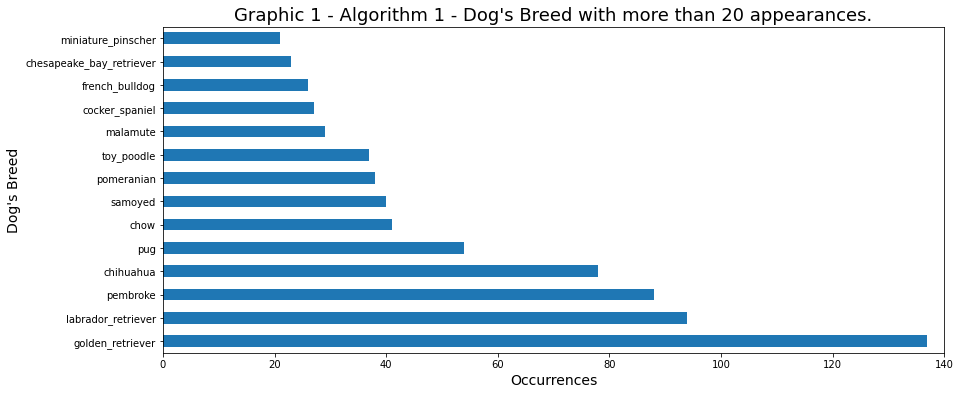

In [133]:
# Value counts to build a histogram.
dog_pref = visual_df[visual_df.p1_dog].p1.value_counts()

# Plotting the graphic.
gp_pop_dog(dog_pref,
           gp_title = 'Graphic 1 - Algorithm 1 - Dog\'s Breed with more than 20 appearances.',
           xlabel = 'Occurrences',
           ylabel = 'Dog\'s Breed')

**P2 Algorithm**

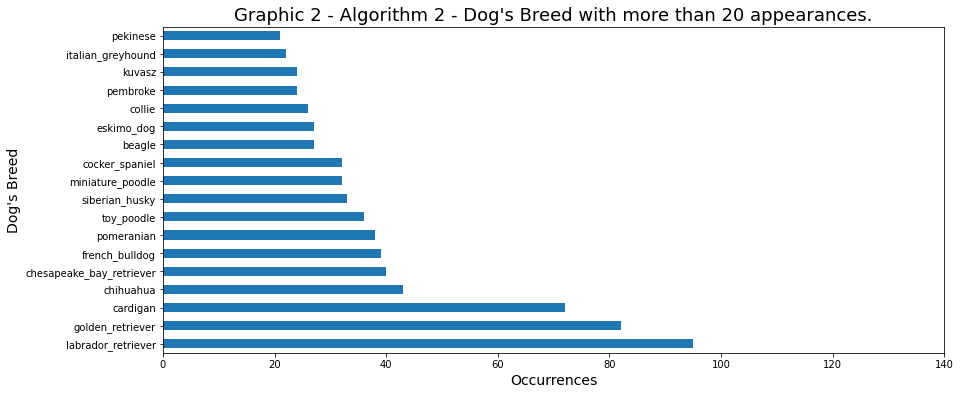

In [134]:
# Dog Preference - Algorithm P2

# Value counts to build a histogram.
dog_pref = visual_df[visual_df.p2_dog].p2.value_counts()

# Plotting the graphic.
gp_pop_dog(dog_pref,
           gp_title = 'Graphic 2 - Algorithm 2 - Dog\'s Breed with more than 20 appearances.',
           xlabel = 'Occurrences',
           ylabel = 'Dog\'s Breed')

**P3 Algorithm**

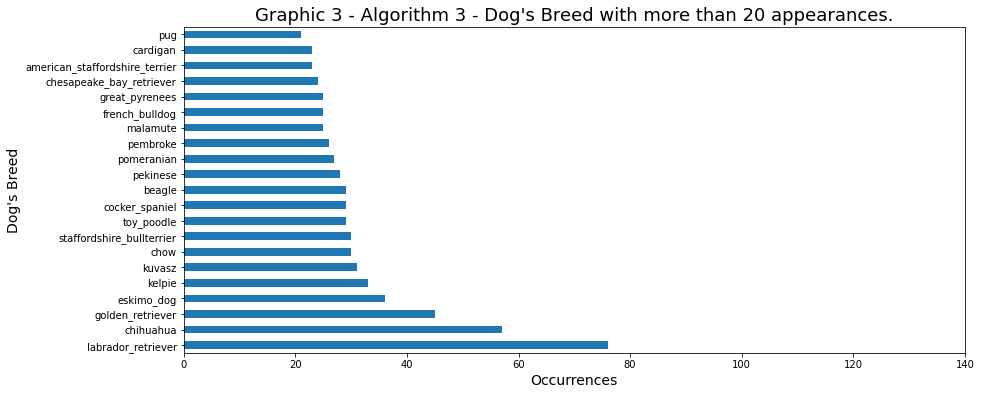

In [136]:
# Dog Preference - Algorithm P3

# Value counts to build a histogram.
dog_pref = visual_df[visual_df.p3_dog].p3.value_counts()

# Plotting the graphic.
gp_pop_dog(dog_pref,
           gp_title = 'Graphic 3 - Algorithm 3 - Dog\'s Breed with more than 20 appearances.',
           xlabel = 'Occurrences',
           ylabel = 'Dog\'s Breed')

**Based on the graphics, the P1 algorithm has fewer breeds and high concentrated bars in some breeds, in the opposite way the P3 algorithm has much more breeds and the dogs are spread in more breeds, in other words, less concentrated bars.**